# Analysis Subpackage 
## Description

This file provides an example file for the functionality of the analysis subpackage.

The analysis subpackage consists of two modules:

**datafill.py**

This module includes the DataEdit parent class and includes the following:

- DataEdit(data)
    - creates DataEdit class object with input from a Pandas DataFrame
- DataEdit.display()
    - getter for the data attribute of the DataEdit instance
- DataEdit.columntype(column)
    - returns the datatype of the column given (either as a column name or column index)
- DataEdit.\_\_add__(other)
    - appends other (given as pandas.DataFrame) to DataEdit's data
- DataEdit.\_\_sub__(other)
    - removes from DataEdit.data the rows it shares with other (other is given as a pandas.DataFrame object)
- DataEdit.rm_duplicates()
    - removes duplicates from DataEdit.data
- DataEdit.rm_nan()
    - removes rows that contain NaN/None values from DataEdit.data
- DataEdit.quick_clean()
    - removes duplicate rows as well as removes rows with NaN/None values

   

This DataEdit class is can be used directly or in conjunction with the Lm class.

**linear_analysis.py**

This module includes the Lm child class of the DataEdit parent class as follows:

- Lm(data)
    - creates Lm class object with input from a Pandas DataFrame
    - methods from DataEdit class inherited
- Lm.single_linear(predictor, estimator)
    - creates a single linear model between predictor and estimator (predictor is y, estimator is x)
    - returns the linear model's prediction on the estimator values
- Lm.single_linear_plot(predictor, estimator)
    - creates a plot of predictor vs estimator, displays the data as well as the created best fit line
- Lm.single_linear_eqn(predictor, estimator)
    - fits a single linear model to the predictor vs estimator
    - prints the equation of the line

## Example

Examples use the CarPrice.csv dataset saved in the data folder of this repo

In [65]:
import pandas as pd
import numpy as np

import quickscreen.analysis.datafill as dfl
import quickscreen.analysis.linear_analysis as la

### Initializing a DataEdit object

In [22]:
df = pd.read_csv("./data/CarPrice.csv")

de = dfl.DataEdit(df)

print(type(de).__name__)

DataEdit


### Example of display

In [23]:
display(de.display().head())

,CarName,curbweight,enginesize,horsepower,peakrpm,citympg,highwaympg,price
0,alfa-romero giulia,2548,130,111,5000,21,27,13495.0
1,alfa-romero stelvio,2548,130,111,5000,21,27,16500.0
2,alfa-romero Quadrifoglio,2823,152,154,5000,19,26,16500.0
3,audi 100 ls,2337,109,102,5500,24,30,13950.0
4,audi 100ls,2824,136,115,5500,18,22,17450.0


### Example of columtype

Getting the data type of a column using the index

In [24]:
print(de.data.columns[2])
print(de.columntype(2))

enginesize
int64


Getting the data type of a column using the column name

In [25]:
print(de.data.columns[2])
print(de.columntype("enginesize"))

enginesize
int64


### Example of addition

In [34]:
# creating demo data
data1 = {
        "a":[1,2,3],
        "b":[11,12,13]
}
df = pd.DataFrame(data1, columns=["a", "b"])
de1 = dfl.DataEdit(df)
data2 = {
        "a":[x for x in range(0, 3)],
        "b":[2*x for x in range(0, 3)]
}
df2 = pd.DataFrame(data2, columns=["a", "b"])

# adding method
de2 = de1 + df2

display(de1.display())
display(df2.head(10))
display(de2.display())

,a,b
0,1,11
1,2,12
2,3,13


,a,b
0,0,0
1,1,2
2,2,4


,a,b
0,1,11
1,2,12
2,3,13
3,0,0
4,1,2
5,2,4


### Example of subtraction

In [46]:
# data set up
df = pd.read_csv("./data/CarPrice.csv")
de = dfl.DataEdit(df)
de1 = dfl.DataEdit(df)

# select a subset of 2 rows
two_row = (df.iloc[0:2])

# subtract method
d = de - two_row
print("number of rows before subtraction", df.shape[0])
print("number of rows after subtraction", d.data.shape[0])
print("we can see that indeed two rows have been subtracted from the data")

number of rows before subtraction 205
number of rows after subtraction 203
we can see that indeed two rows have been subtracted from the data


### Example of dropping duplicates

In [54]:
# rm_duplicates example
data = {
        "a":[1,2,3,4,5,6,4],
        "b":[11,12,13,14,15,np.nan,14]
        }
df = pd.DataFrame(data, columns=["a", "b"])
de = dfl.DataEdit(df)

print("before dropping duplicates")
print(de.data.head(10))

de_no_na = de.rm_duplicates()
print("\nafter dropping duplices")
print(de_no_na.data.head(10))

before dropping duplicates
   a     b
0  1  11.0
1  2  12.0
2  3  13.0
3  4  14.0
4  5  15.0
5  6   NaN
6  4  14.0

after dropping duplices
   a     b
0  1  11.0
1  2  12.0
2  3  13.0
3  4  14.0
4  5  15.0
5  6   NaN


We can see that the last row, a duplicate, has been removed

### Example of removing nan's

In [57]:
data = {
        "a":[1,2,3,4,5,6,7],
        "b":[11,12,13,14,15,np.nan,17]
        }
df = pd.DataFrame(data, columns=["a", "b"])
de = dfl.DataEdit(df)

print(de.data.head(10))
print(" ")

de_no_na = de.rm_nan()
print(de_no_na.data.head(10))

   a     b
0  1  11.0
1  2  12.0
2  3  13.0
3  4  14.0
4  5  15.0
5  6   NaN
6  7  17.0
 
   a     b
0  1  11.0
1  2  12.0
2  3  13.0
3  4  14.0
4  5  15.0
6  7  17.0


We can see that the 5th row that contained a NaN has been removed

### Example of quick clean

In [61]:
data = {
        "a":[1,2,3,4,5,6,4],
        "b":[11,12,13,14,15,np.nan,14]
        }
df = pd.DataFrame(data, columns=["a", "b"])
de = dfl.DataEdit(df)

print(de.data.head(10))

print(" ")
de_no_na = de.quick_clean()
print(de_no_na.data.head(10))

   a     b
0  1  11.0
1  2  12.0
2  3  13.0
3  4  14.0
4  5  15.0
5  6   NaN
6  4  14.0
 
   a     b
0  1  11.0
1  2  12.0
2  3  13.0
3  4  14.0
4  5  15.0


We can see that the duplicate and the NaN rows have been removed

### Example of initializing the linear model class

In [67]:
df = pd.read_csv("./data/CarPrice.csv")
lm = la.Lm(df)

### Example of single linear regression

In [71]:
slr = lm.single_linear("horsepower", "enginesize")    
print(slr[:5])

[[106.49522718]
 [106.49522718]
 [123.41237951]
 [ 90.34703631]
 [111.108996  ]]


### Example of single lienar plot

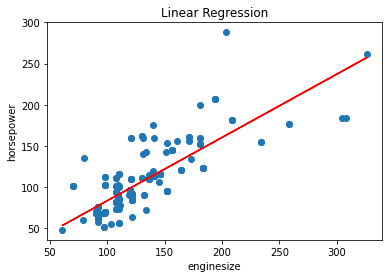

In [74]:
lm.single_linear_plot("horsepower", "enginesize")

### Example of getting the parameters of a single linear regression model

In [76]:
lm.single_linear_eqn("horsepower", "enginesize")

y=0.77x+6.53
